# <font color=green> Funcioanamento do GeoPandas

O GeoPandas é um projeto open source que foi criado para tornar a manipulação de dados geoespaciais no Python uma tarefa mais simples. Ele estende as estruturas de dados do Pandas, que são o dataframe e o series, possibilitando a manipulação e tratamento de arquivos dessa natureza.

Além disso, ele possui uma série de dependências importantes, dentre elas: o shapely, que dá suporte a operações geométricas; o fiona, que permite acessar arquivos com informações geográficos; e o Matplotlib (juntamente com o http://localhost:8888/tree), que permite a plotagem de gráficos e figuras geométricas.

# <font color=green>Fonte de Dados do IBGE:

ftp://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2017/UFs/

# <font color=green>Fonte de Dados do Data Rio:


http://www.data.rio/search?groupIds=cbe84df2333a463b9d4e20aca5177936&sort=-modified

# <font color=grey>Preparar ambiente

In [109]:
%matplotlib inline
import geopandas as gpd
import pandas as pd
import os

# <font color= green>1.Importar e trabalhar nos *shapefiles*

In [110]:
#Ler arquivo (ESTADO DO RIO DE JANEIRO)
rj_est=gpd.read_file('Dados/Mapas/RJ/33MUE250GC_SIR.shp')
#Visualização preliminar
rj_est.head(10)

,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,1468,3300100,ANGRA DOS REIS,(POLYGON ((-44.33207951767609 -23.023835479182...
1,1469,3300159,APERIBÉ,POLYGON ((-42.08950238077959 -21.6289329293311...
2,1470,3300209,ARARUAMA,POLYGON ((-42.22525542277279 -22.5925335128971...
3,1471,3300225,AREAL,POLYGON ((-43.16007457995859 -22.2000478703121...
4,1472,3300233,ARMAÇÃO DOS BÚZIOS,(POLYGON ((-41.9842653529651 -22.7445758290788...
5,1473,3300258,ARRAIAL DO CABO,(POLYGON ((-42.0049619482714 -23.0233794261651...
6,1474,3300308,BARRA DO PIRAÍ,"POLYGON ((-44.0608372667983 -22.4520174096408,..."
7,1475,3300407,BARRA MANSA,POLYGON ((-44.22168233628889 -22.4797143178036...
8,1476,3300456,BELFORD ROXO,POLYGON ((-43.37030298525939 -22.6942563175787...
9,1477,3300506,BOM JARDIM,POLYGON ((-42.3799453639823 -22.12575261103269...


## <font color=green> Visulização preliminar

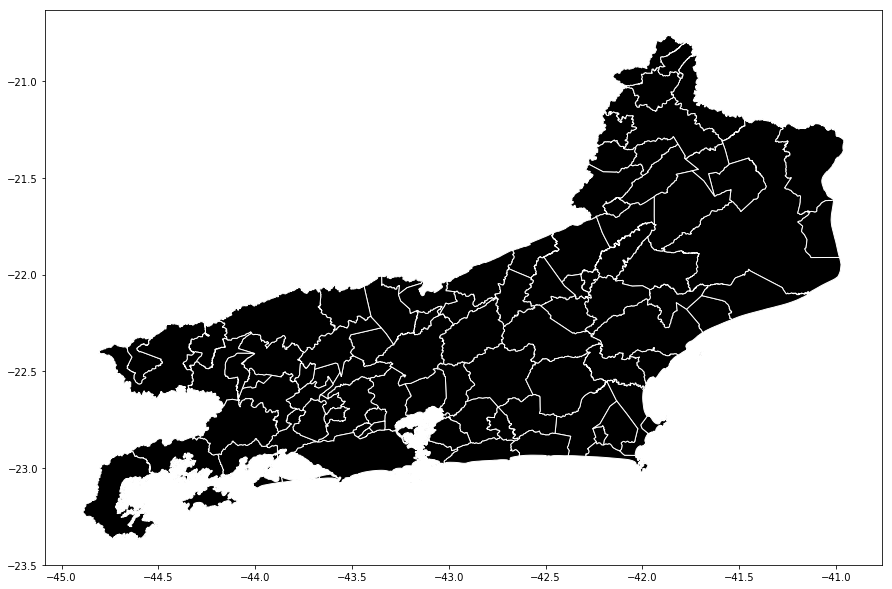

In [111]:
Estado_Rio=rj_est.plot(color='black', edgecolor='white', figsize=(15,15))

# <font color=green>2. Focando em um município (Rio de Janeiro- RJ)

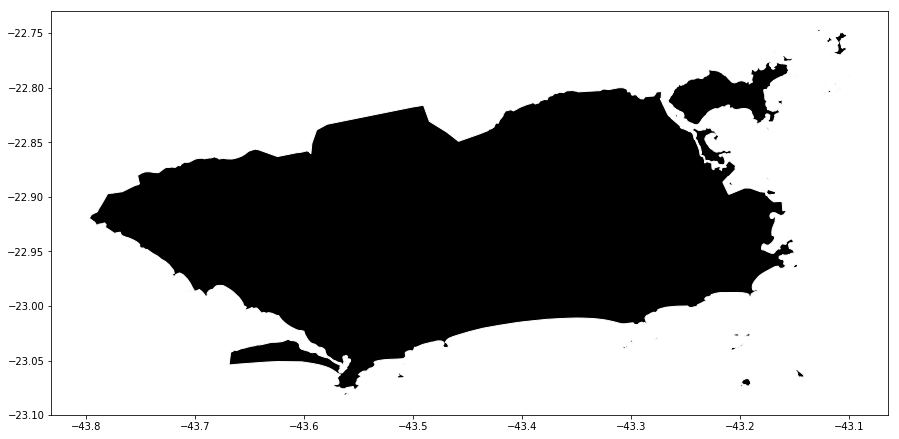

In [112]:
rj=rj_est[rj_est.NM_MUNICIP=='RIO DE JANEIRO']
Cidade_Rio=rj.plot(color='black', edgecolor='white', figsize=(15,15))

In [113]:
# Criar pasta no diretório local
dir='Dados/Mapas/RJ-MUNIC'
if not os.path.exists(dir):
    os.makedirs(dir)

# <font color=green> 3.Trabalhando com dados de aluguel de imóveis geolocalizado
* Ano de referência:2019

In [114]:
dados = pd.read_table('Dados\dados.txt',sep='\t')
dados.head(3)

C:\Users\Felipe\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000


## <font color=green> Transformar dados em *geodataframe*

In [115]:
# Criar geo data frame
from shapely.geometry import Point
x=zip(dados.Longitude,dados.Latitude)
geometry=[Point(x) for x in zip(dados.Longitude,dados.Latitude) ]
crs = {'proj': 'latlong', 'ellps': 'WGS84', 'datum': 'WGS84', 'no_defs': True}
geo_dados=gpd.GeoDataFrame(dados,crs=crs,geometry=geometry)
geo_dados.head(3)

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (-43.4629464 -23.0164552)
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (-43.3369111 -22.9431995)
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (-43.300517 -22.873849)


* Note que uma nova coluna geometry surgiu no final do arquivo

In [116]:
# Criar pasta no diretório local
dir='Dados/Mapas/RJ-DATASET'
if not os.path.exists(dir):
    os.makedirs(dir) 
geo_dados.to_file(dir+'/DATASET.shp')

# <font color =green>4. Covereter todos os aquivos para omesmo crs
O CRS (ou "sistema de referência de coordenadas") é uma forma padronizada de escrever as localizações no globo terrestre. Existe mais de um CRS, e sua escolha depende de um conjunto de fatores, como a abrangência geográfica ou mesmo em que época os dados foram coletados. Quando queremos comparar conjuntos de dados com CRSs diferentes, é importante estabelecer um CRS em comum entre eles para torná-los comparáveis - e aprenderemos a fazer isso no futuro.
Existem três parâmetros que, geralmente, aparecem na maioria das configurações de CRS:

**crs = {'proj':'latlong','ellps':'WGS84'.'datum':'WGS84'}** 

Essa é, inclusive, a configuração que utilizamos no nosso projeto

In [117]:
#Mudar crs do municipio
rj = rj.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')
geo_dados = geo_dados.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

# <font color=green>5. Combinar infomações geolocalizadas

## <font color=green>Elimiar informações que estejam fora do contorno do município

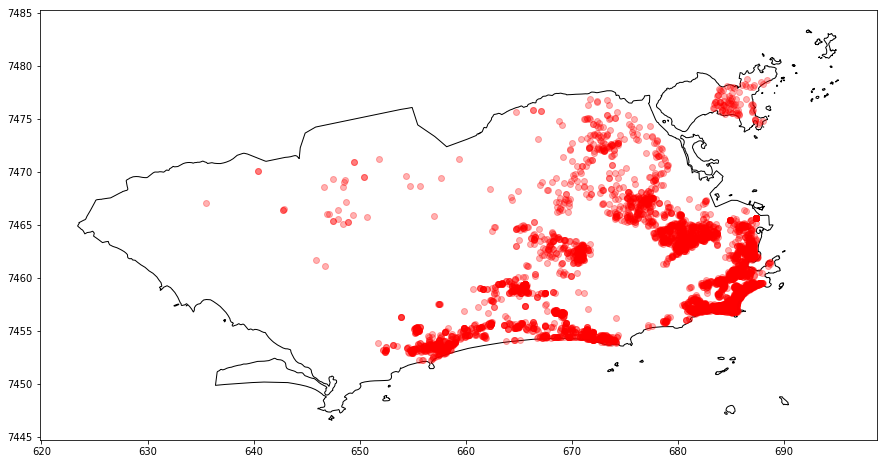

In [118]:
geo_dados=geo_dados[geo_dados['geometry'].within(rj.iloc[0].geometry)]
base=rj.plot(color='white', edgecolor='black', figsize=(15,15))
geo_dados.plot(ax=base,color='red',alpha=0.3)

# <font color=green>6.Combinar com informações de transporte

## <font color=green>Metrô
* Obs: os dados tiveram que ser transformados por problemas de compatibilidade

In [119]:
metro = pd.read_table('dados\metro.txt',sep='\t')
metro.head()

C:\Users\Felipe\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


,Nome,Flg_ATM,Flg_Bicicletario,Flg_Elevador,Flg_Linha1,Flg_Linha2,Data_Inauguracao,Latitude,Longitude
0,Pavuna,1,1.0,1.0,0,1,1998,-22.806620,-43.364848
1,Engenheiro Rubens Paiva,1,1.0,1.0,0,1,1998,-22.816266,-43.358452
2,Acari / Fazenda Botafogo,0,0.0,0.0,0,1,1998,-22.824518,-43.349642
3,Coelho Neto,1,0.0,0.0,0,1,1998,-22.831475,-43.343257
4,Colegio,1,1.0,0.0,0,1,1998,-22.842685,-43.333861


In [120]:
from shapely.geometry import Point
x=zip(metro.Longitude,dados.Latitude)

# Criar geo data frame
geometry=[Point(x) for x in zip(metro.Longitude,metro.Latitude) ]
crs = {'proj': 'latlong', 'ellps': 'WGS84', 'datum': 'WGS84', 'no_defs': True}
metro_geo_dados=gpd.GeoDataFrame(metro,crs=crs,geometry=geometry)
metro.head(3)



,Nome,Flg_ATM,Flg_Bicicletario,Flg_Elevador,Flg_Linha1,Flg_Linha2,Data_Inauguracao,Latitude,Longitude,geometry
0,Pavuna,1,1.0,1.0,0,1,1998,-22.806620,-43.364848,POINT (-43.36484819 -22.80661994)
1,Engenheiro Rubens Paiva,1,1.0,1.0,0,1,1998,-22.816266,-43.358452,POINT (-43.35845219 -22.81626621)
2,Acari / Fazenda Botafogo,0,0.0,0.0,0,1,1998,-22.824518,-43.349642,POINT (-43.34964248 -22.82451848)


In [121]:
#Converter crs
metro_geo_dados = metro_geo_dados.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')
metro_geo_dados.to_file('Dados/Mapas/RJ-DATASET/METRO.shp')

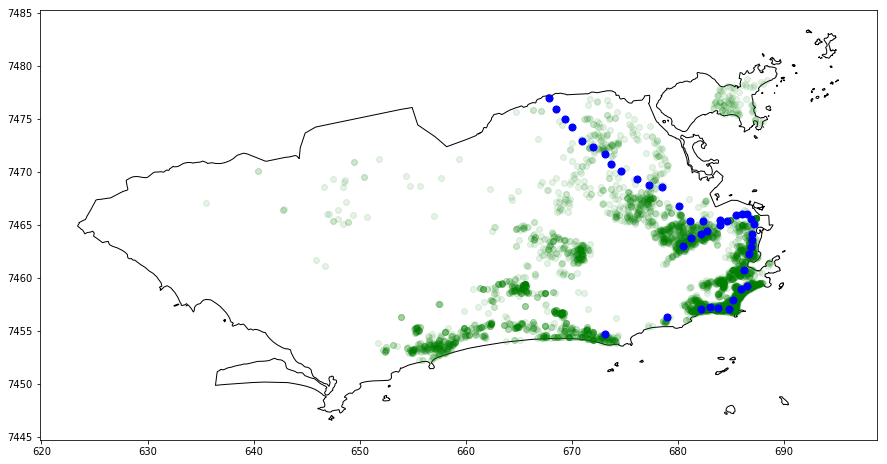

In [122]:
# Visualizar
base = rj.plot(color='white', edgecolor='black', figsize=(15,8))
geo_dados.plot(ax=base, color='green', alpha=0.1)
metro_geo_dados.plot(ax=base, color='blue', markersize= 50)

## <font color=green> Trem

In [123]:
trem= gpd.read_file('Dados/Estações_Trem.geojson')
trem = trem.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')
trem.head(3)

,OBJECTID,Cod,Nome,Flg_IntegraOnibus,Flg_IntegraMetro,Flg_Terminal,Flg_TransfRamal,Flg_TransfCentral,Flg_IntegraTele,Flg_Mun,...,Flg_Deodoro,Flg_SantaCruz,Flg_Japeri,Flg_Paracambi,Flg_VilaInhomirim,Flg_Guapimirim,Data_Inc,Integra_BRT,Corredor_BRT,geometry
0,1,60,Nova Iguaçu,None,None,Sim,None,None,None,Não,...,None,None,Sim,None,None,None,None,None,None,POINT (659.2008938493624 7482.133312152019)
1,2,20,Comendador Soares,None,None,None,None,None,None,Não,...,None,None,Sim,None,None,None,None,None,None,POINT (655.1577743416112 7484.011444107789)
2,3,4,Austin,None,None,None,None,None,None,Não,...,None,None,Sim,None,None,None,None,None,None,POINT (651.7164927851868 7486.68585551101)


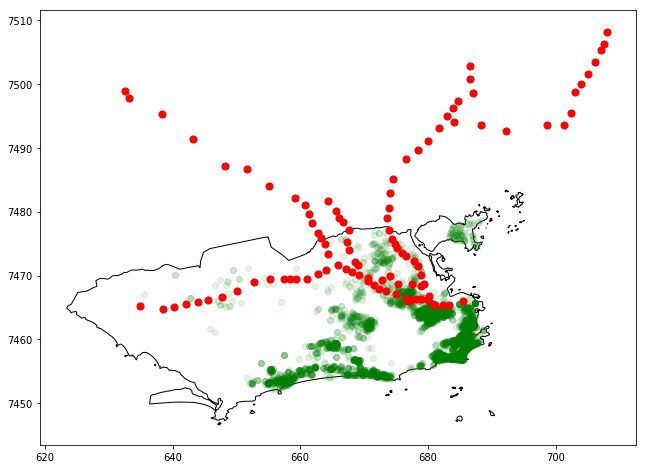

In [124]:
base = rj.plot(color='white', edgecolor='black', figsize=(15,8))
geo_dados.plot(ax=base, color='green', alpha=0.1)
trem.plot(ax=base, color='red', markersize= 50)

* Note que as linhas de trem também servem a região metropolitana da cidade

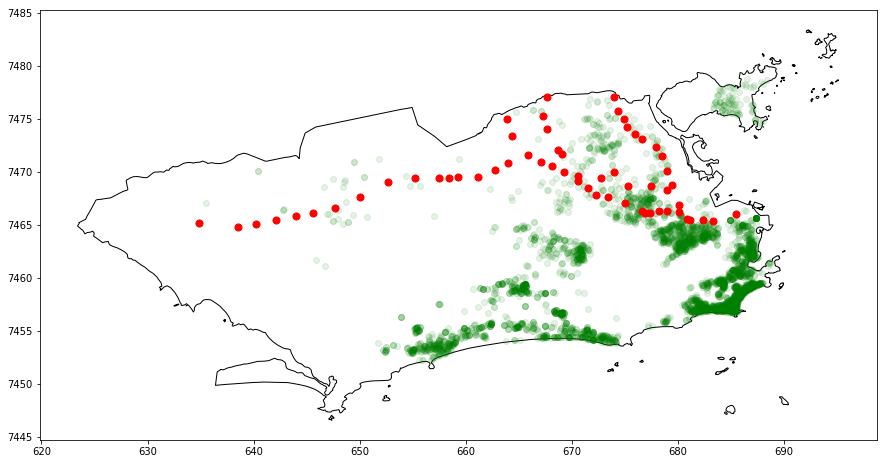

In [125]:
#Apenasas a parte que de fato esta cidade
trem = trem[trem.within(rj.iloc[0].geometry)]
base = rj.plot(color='white', edgecolor='black', figsize=(15,8))
geo_dados.plot(ax=base, color='green', alpha=0.1)
trem.plot(ax=base, color='red', markersize= 50)

## <font color=green> BRT

In [126]:
BRT= gpd.read_file('Dados/Estações_BRT.geojson')
BRT = BRT.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')
BRT.head(3)

,OBJECTID,Nome,Flg_Ativo,Status,X,Y,Flg_TransCarioca,Flg_TransBrasil,Flg_TransOeste,Flg_TransOlimpica,ChaveGeo,Data_Inc,Integra_Trem,Integra_Metro,Integra_Aeroporto,geometry
0,1,Santa Luzia,Sim,Implantada,679342.4694,7.471500e+06,Sim,Não,Não,Não,None,None,Não,Não,Não,POINT (679.3028577039963 7471.454991554974)
1,2,Maré,Sim,Implantada,680236.1565,7.472380e+06,Sim,Não,Não,Não,None,None,Não,Não,Não,POINT (680.1965448658054 7472.33501849921)
2,3,Cardoso de Moraes - Viúva Garcia,Sim,Implantada,678744.0560,7.471252e+06,Sim,Não,Não,Não,None,None,Não,Não,Não,POINT (678.7044443441948 7471.207542136781)


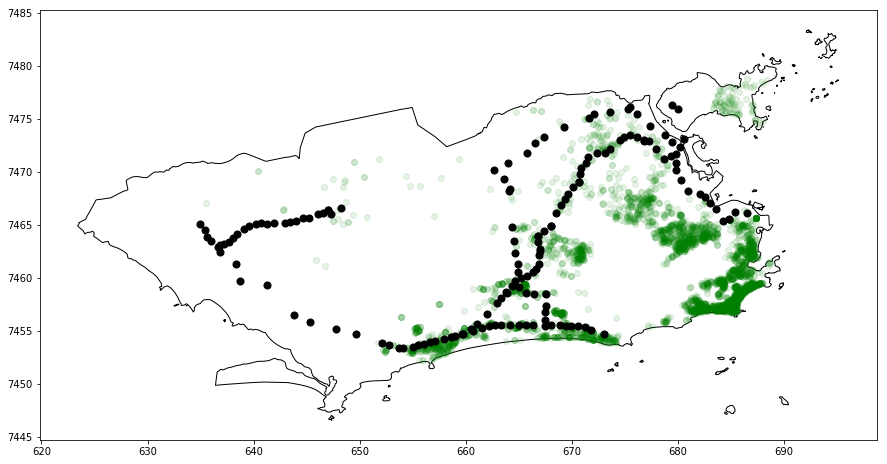

In [127]:
base = rj.plot(color='white', edgecolor='black', figsize=(15,8))
geo_dados.plot(ax=base, color='green', alpha=0.1)
BRT.plot(ax=base, color='black', markersize= 50)

## <font color=green> Todos

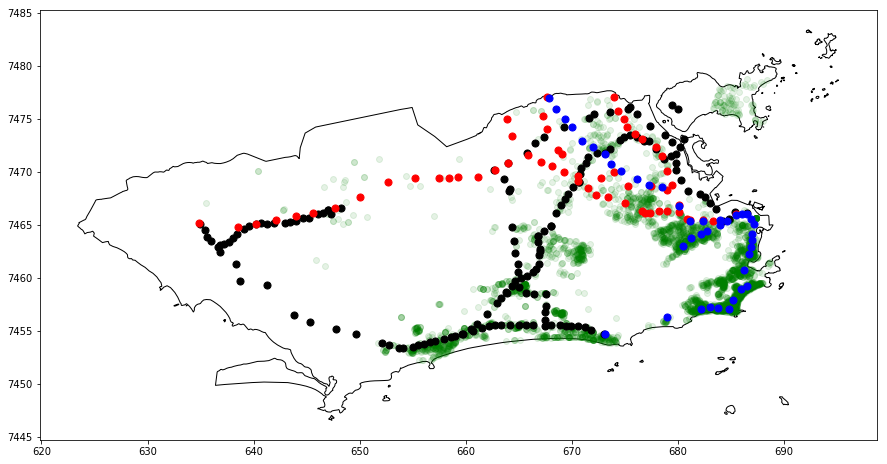

In [128]:
base = rj.plot(color='white', edgecolor='black', figsize=(15,8))
geo_dados.plot(ax=base, color='green', alpha=0.1)
BRT.plot(ax=base, color='black', markersize= 50)
trem.plot(ax=base, color='red', markersize= 50)
metro_geo_dados.plot(ax=base, color='blue', markersize= 50)

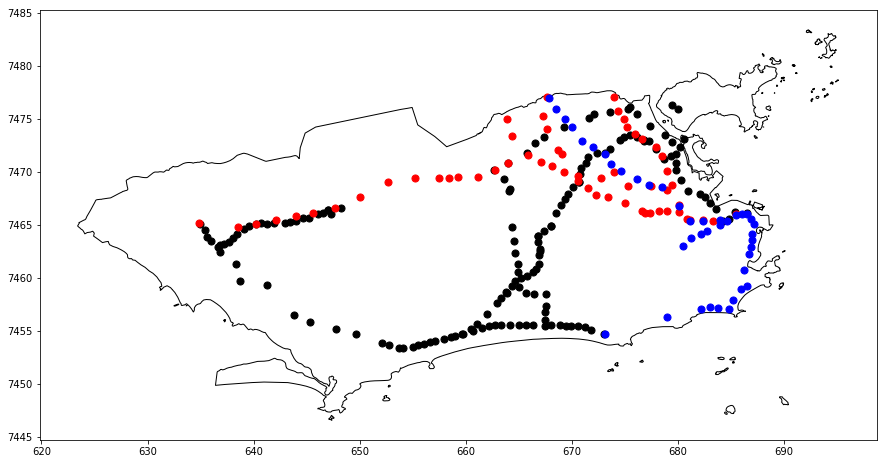

In [129]:
# Apenas os meios transporte 
base = rj.plot(color='white', edgecolor='black', figsize=(15,8))
BRT.plot(ax=base, color='black', markersize= 50)
trem.plot(ax=base, color='red', markersize= 50)
metro_geo_dados.plot(ax=base, color='blue', markersize= 50)

# <font color=green>7.Correlações simples

## <font color=green>Calcular distância do imóvel até o transporte mais próximo

In [130]:
transporte = pd.concat([trem.geometry, metro.geometry, BRT.geometry], ignore_index = True)
geo_dados['Dist_Transporte'] = geo_dados['geometry'].apply(lambda x: transporte.distance(x).min())
geo_dados.head(3)

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry,Dist_Transporte
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (657.5137068691058 7453.832425203198),0.443193
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (670.5239029320986 7461.803087641324),3.642787
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (674.3450038415888 7469.439743130414),0.641470


## <font color=green> Correlações com o valor do aluguel

In [131]:
geo_dados.corr()

,Area,Latitude,Longitude,Quartos,Suites,Vagas,Valor,Dist_Transporte
Area,1.000000,-0.289299,0.029982,0.681112,0.585817,0.594699,0.724397,0.170009
Latitude,-0.289299,1.000000,0.292822,-0.225226,-0.346480,-0.274707,-0.299038,-0.177122
Longitude,0.029982,0.292822,1.000000,-0.016882,-0.221548,-0.283960,0.191868,0.643628
Quartos,0.681112,-0.225226,-0.016882,1.000000,0.529611,0.520499,0.481216,0.130566
Suites,0.585817,-0.346480,-0.221548,0.529611,1.000000,0.621140,0.464075,-0.044060
Vagas,0.594699,-0.274707,-0.283960,0.520499,0.621140,1.000000,0.456596,-0.130278
Valor,0.724397,-0.299038,0.191868,0.481216,0.464075,0.456596,1.000000,0.402355
Dist_Transporte,0.170009,-0.177122,0.643628,0.130566,-0.044060,-0.130278,0.402355,1.000000


In [132]:
coef=geo_dados['Valor'].corr(geo_dados['Dist_Transporte'])
coef

0.40235491620601593